In [465]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [466]:
L = 1
g=9.81

In [467]:
h = 0.01
t = np.linspace(0, 10, int(10/h))

In [468]:
def System(r,t):

    theta,thetap = r
    thetapp = (((2*g/L)-((thetap**2)*np.cos(theta)))*np.sin(theta))/((1/3)+(np.sin(theta)**2))
    
    return [thetap,thetapp]

In [469]:
def Integrator2(f,r0,t):
    
    theta = np.zeros_like(t)
    dtheta = np.zeros_like(t)
    
    theta[0] = r0[0]
    dtheta[0] = r0[1]

    
    K1 = np.zeros(2)
    K2 = np.zeros(2)
    
    # Las pendientes instantaneas
    R = np.zeros(2)

    for i in range(1,len(t)):
        
        R = np.array([theta[i-1],dtheta[i-1]])
        
        K1 = f(R,t[i-1])
        
        R = np.array([theta[i-1]+h*K1[0],dtheta[i-1]+h*K1[1]])
        
        K2 = f(R,t[i-1])
        
        theta[i] = theta[i-1] + 0.5*h*(K1[0]+K2[0])
        dtheta[i] = dtheta[i-1] + 0.5*h*(K1[1]+K2[1])

        
    return theta, dtheta

In [470]:
theta0 = 10*np.pi/180
thetap = 0.
r0 = [theta0,thetap]

In [471]:
theta, thetap = Integrator2(System,r0,t)

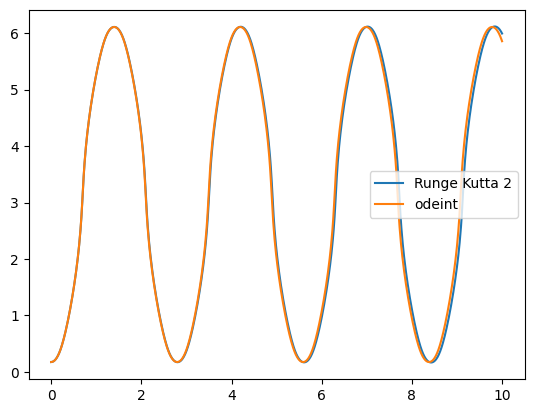

In [472]:
plt.plot(t,theta, label='Runge Kutta 2')
r = integrate.odeint(System, r0, t)
theta1 = r[:, 0]
dtheta1 = r[:, 1]
plt.plot(t, theta1, label='odeint')
plt.legend()

In [473]:
x_cm = 0.5*L * np.cos(theta)
y_cm = 0.5*L * np.sin(theta)


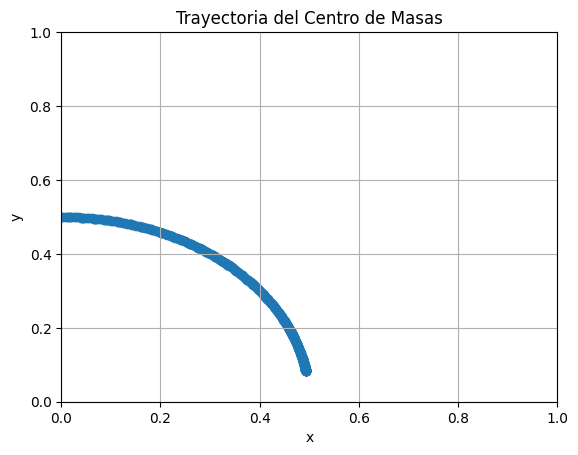

In [474]:
plt.scatter(x_cm, y_cm)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title('Trayectoria del Centro de Masas')
plt.grid(True)